In [1]:
import pandas as pd
import warnings
import numpy as np
import random
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

warnings.filterwarnings("ignore")

!pip install kaggle

cred = {"username":"akmalariq9","key":"226c6c52a4e488b79657373a7aeedfd3"}

!mkdir ~/.kaggle/
!touch ~/.kaggle/kaggle.json

import json
api_token = cred

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d imakash3011/customer-personality-analysis

!unzip customer-personality-analysis.zip

  0% 0.00/62.0k [00:00<?, ?B/s]
100% 62.0k/62.0k [00:00<00:00, 1.68MB/s]
Archive:  customer-personality-analysis.zip
  inflating: marketing_campaign.csv  


In [3]:
df = pd.read_csv('/content/marketing_campaign.csv', delimiter="\t")

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [8]:
df.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [9]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y", errors="coerce")

In [10]:
df["Dt_Customer"].info()

<class 'pandas.core.series.Series'>
Int64Index: 2216 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2216 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 34.6 KB


### Exploratory data analysis (EDA) and Vizualitation

In [19]:
data = df.copy()

data['Age'] = 2024 - data['Year_Birth']

In [20]:
data['outcome'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

In [24]:
data = data.rename(columns={'NumWebPurchases': 'Web',
                            'NumCatalogPurchases':'Catalog',
                            'NumStorePurchases':'Store',
                            'MntWines': "Wines",
                            'MntFruits':'Fruits',
                            'MntMeatProducts':'Meat',
                            'MntFishProducts':'Fish',
                            'MntSweetProducts':'Sweets',
                            'MntGoldProds':'Gold',
                            'NumDealsPurchases':'Deals'
                            })

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 2216 non-null   int64         
 1   Year_Birth         2216 non-null   int64         
 2   Education          2216 non-null   object        
 3   Marital_Status     2216 non-null   object        
 4   Income             2216 non-null   float64       
 5   Kidhome            2216 non-null   int64         
 6   Teenhome           2216 non-null   int64         
 7   Dt_Customer        2216 non-null   datetime64[ns]
 8   Recency            2216 non-null   int64         
 9   Wines              2216 non-null   int64         
 10  Fruits             2216 non-null   int64         
 11  Meat               2216 non-null   int64         
 12  Fish               2216 non-null   int64         
 13  Sweets             2216 non-null   int64         
 14  Gold    

In [29]:
map = {'Divorced': 0, 'Single': 0, 'Alone': 0, 'Absurd': 0, 'Widow': 0, 'YOLO': 0, 'Married': 1,'Together': 1}
data.Marital_Status.replace(map, inplace=True)

In [32]:
data['Marital_Status'].unique()

array([0, 1])

In [33]:
map = {'Basic': 0, '2n Cycle': 0, 'Graduation': 1, 'Master': 1, 'PhD': 1}
data.Education.replace(map, inplace=True)

In [34]:
data['Education'].unique()

array([1, 0])

In [35]:
data['Children'] = data['Kidhome'] + data['Teenhome']

In [38]:
def has_chid_or_no(x):
    if x > 0:
        return "1"
    else :
        return "0"

data['Has_child'] = data["Children"].apply(has_chid_or_no)

In [39]:
data['Has_child'].value_counts()

Has child    1583
No child      633
Name: Has_child, dtype: int64

In [43]:
data['All_campaigns'] = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

In [44]:
data['All_campaigns'].value_counts().to_frame()

,All_campaigns
0,1757
1,323
2,81
3,44
4,11


In [47]:
drop_column = ['ID', 'Year_Birth' ,'Kidhome','Teenhome', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','AcceptedCmp1', 'AcceptedCmp2', 'Z_CostContact', 'Z_Revenue', 'All_Campaigns']
data.drop(drop_column, inplace=True, axis=1)
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Deals', 'Web',
       'Catalog', 'Store', 'NumWebVisitsMonth', 'Complain', 'Response', 'Age',
       'outcome', 'Children', 'Has_child', 'Total_Campaigns', 'All_campaigns'],
      dtype='object')

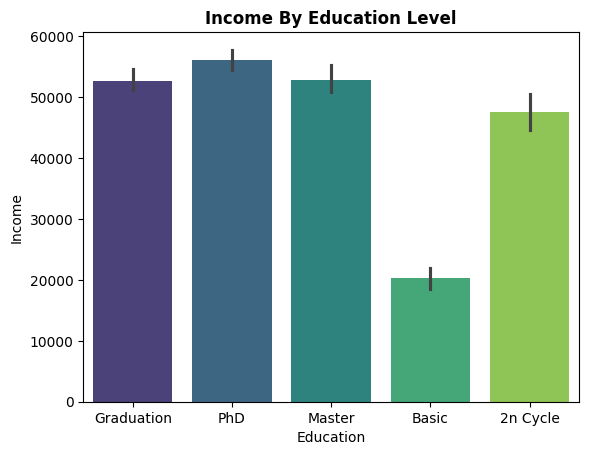

In [16]:
import seaborn as sns

sns.barplot(x="Education", y="Income", palette="viridis", data=df)
plt.title("Income by Education level".title() , weight="bold")
plt.show()

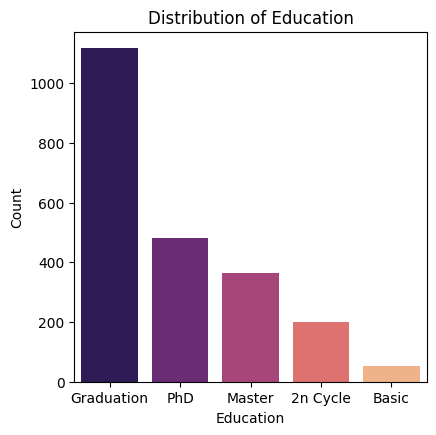

In [17]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='Education', data=df, order=df['Education'].value_counts().index, palette='magma')
plt.title('Distribution of Education')
plt.xlabel('Education')
plt.ylabel('Count')

plt.show()

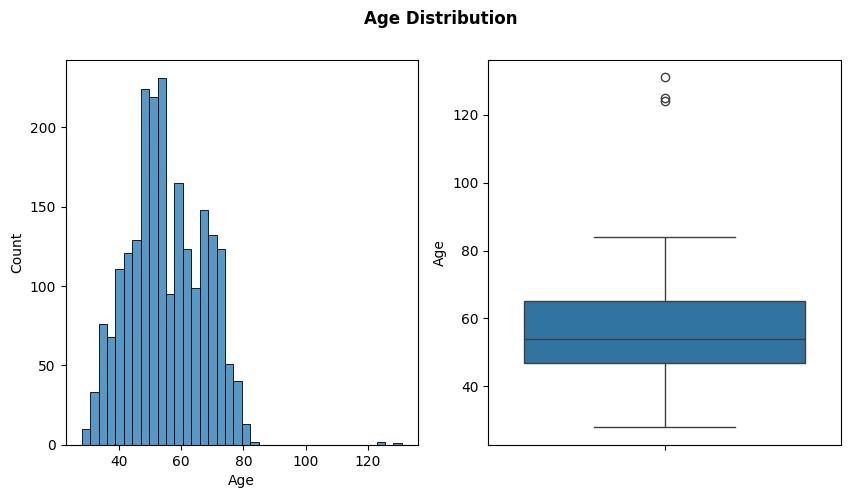

In [52]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
sns.histplot(ax=ax[0], data=data, x="Age")
sns.boxplot(ax=ax[1], data=data, y="Age")
fig.suptitle('Age Distribution', weight="bold")
plt.show()

In [53]:
age_mean = data['Age'].mean()
data.loc[data['Age'] > 85,'Age'] = age_mean

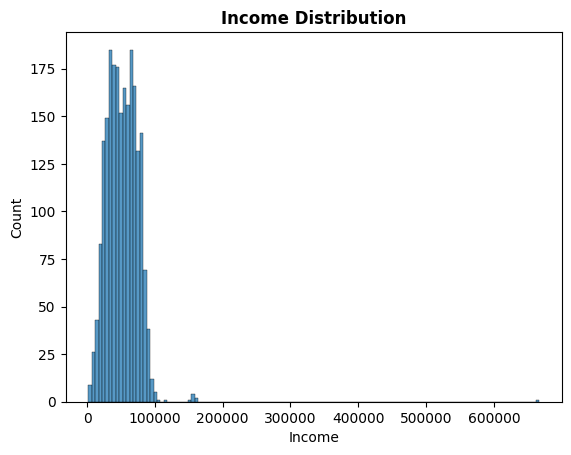

In [59]:
sns.histplot(data=data, x="Income")
plt.title("Income Distribution", weight="bold")
plt.show()

In [63]:
products = data[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']]
products.describe()

,Wines,Fruits,Meat,Fish,Sweets,Gold
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253
std,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000
50%,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000
75%,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000
max,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000


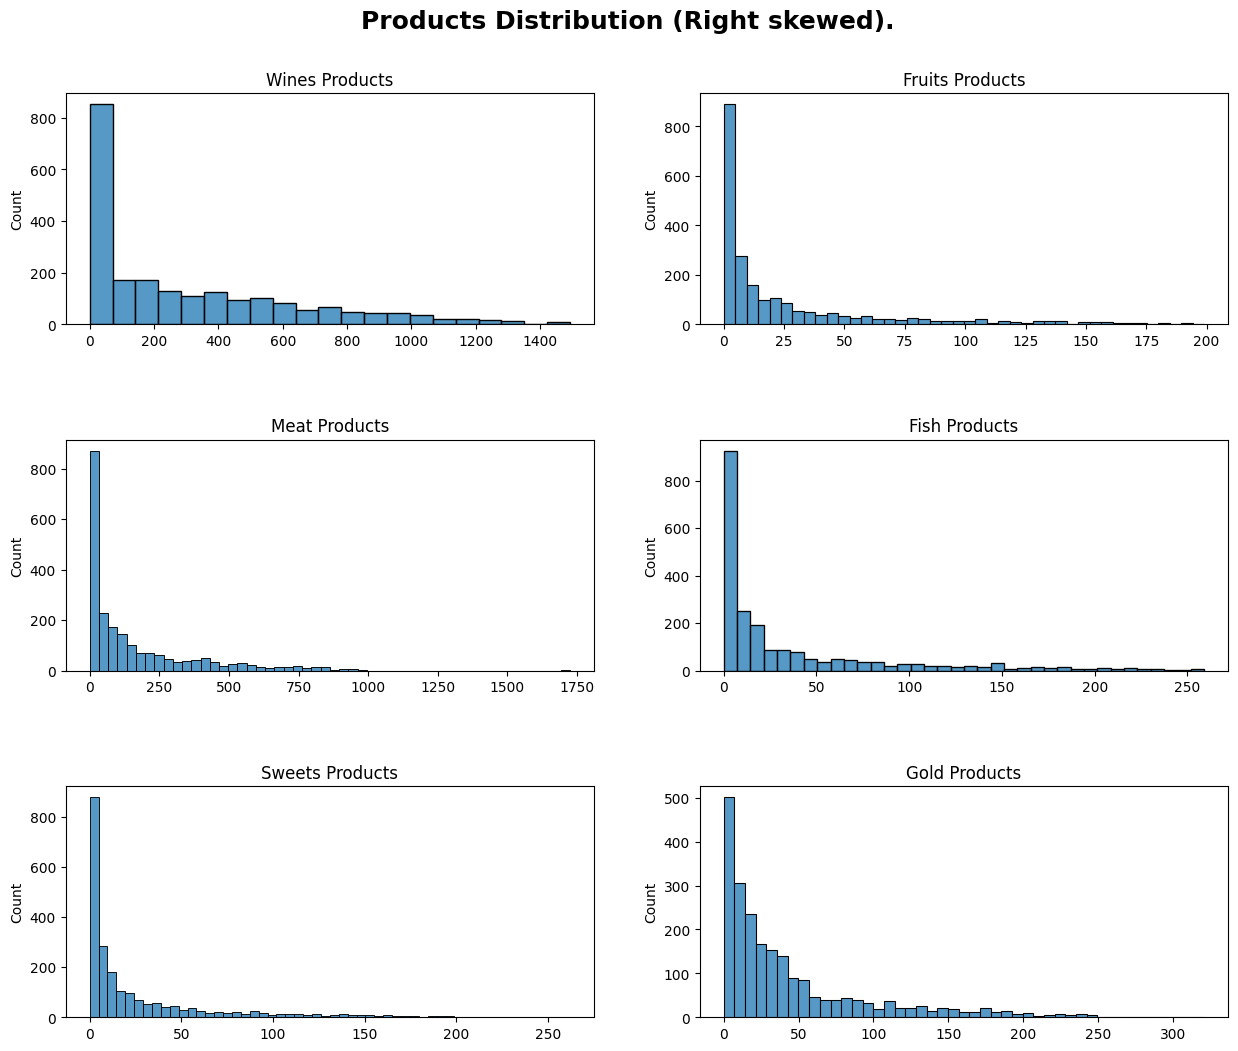

In [90]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Products Distribution (Right skewed).", fontsize=18, y=0.95, weight="bold")

for i, product in enumerate(products.columns.tolist()):
    ax = plt.subplot(3, 2, i + 1)
    sns.histplot(ax=ax, data=products, x=products[product])
    ax.set_title(f"{product} Products")
    ax.set_xlabel("")

plt.show()

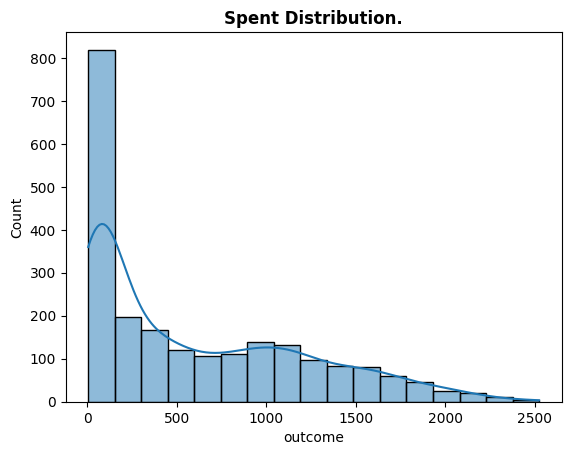

In [67]:
sns.histplot(data=data, x="outcome", kde=True, edgecolor="black")
plt.title("Spent Distribution.", weight="bold")
plt.show()

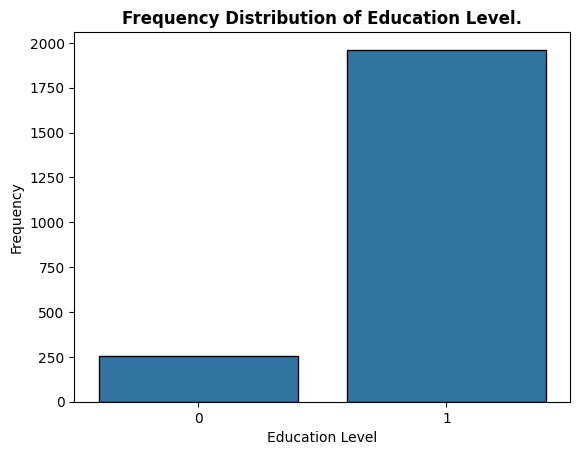

In [68]:
sns.countplot(data=data, x="Education",edgecolor="black")
plt.title("Frequency Distribution of Education Level.", weight="bold")
plt.xlabel("Education Level")
plt.ylabel("Frequency")
plt.show()

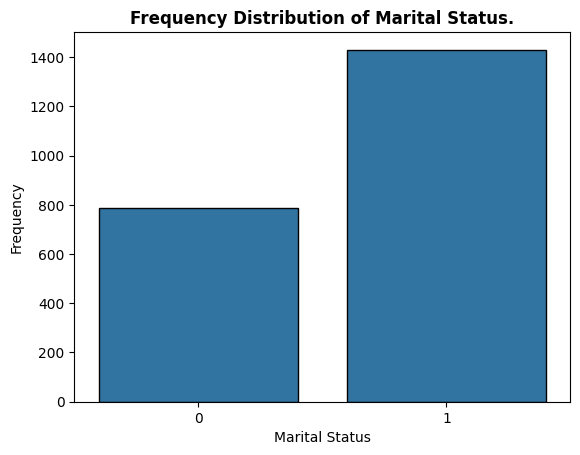

In [70]:
sns.countplot(data=data, x="Marital_Status", edgecolor="black")
plt.title("Frequency Distribution of Marital Status.", weight="bold")
plt.xlabel("Marital Status")
plt.ylabel("Frequency")
plt.show()

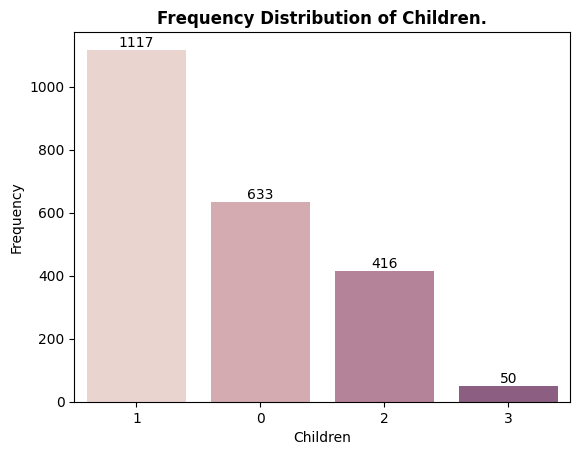

In [85]:
ax = sns.countplot(data=data, x="Children", order = data['Children'].value_counts().index, palette=sns.cubehelix_palette())
for label in ax.containers:
    ax.bar_label(label)
plt.title("Frequency Distribution of Children.", weight="bold")
plt.xlabel("Children")
plt.ylabel("Frequency")
plt.show()

In [76]:
import plotly.express as px

px.histogram(data,
             x="Has_child",
             color_discrete_sequence=px.colors.qualitative.Antique,
             title= "Visualizing Has Child")

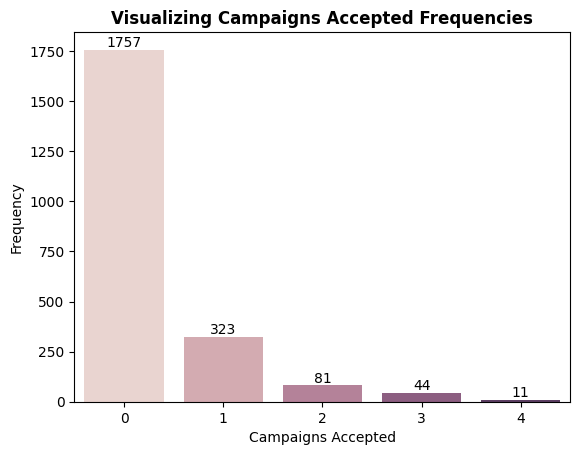

In [81]:
ax = sns.countplot(data=data, x="Total_Campaigns", palette=sns.cubehelix_palette())
for label in ax.containers:
    ax.bar_label(label)
plt.title("Visualizing Campaigns Accepted Frequencies", weight="bold")
plt.xlabel("Campaigns Accepted")
plt.ylabel("Frequency")
plt.show()

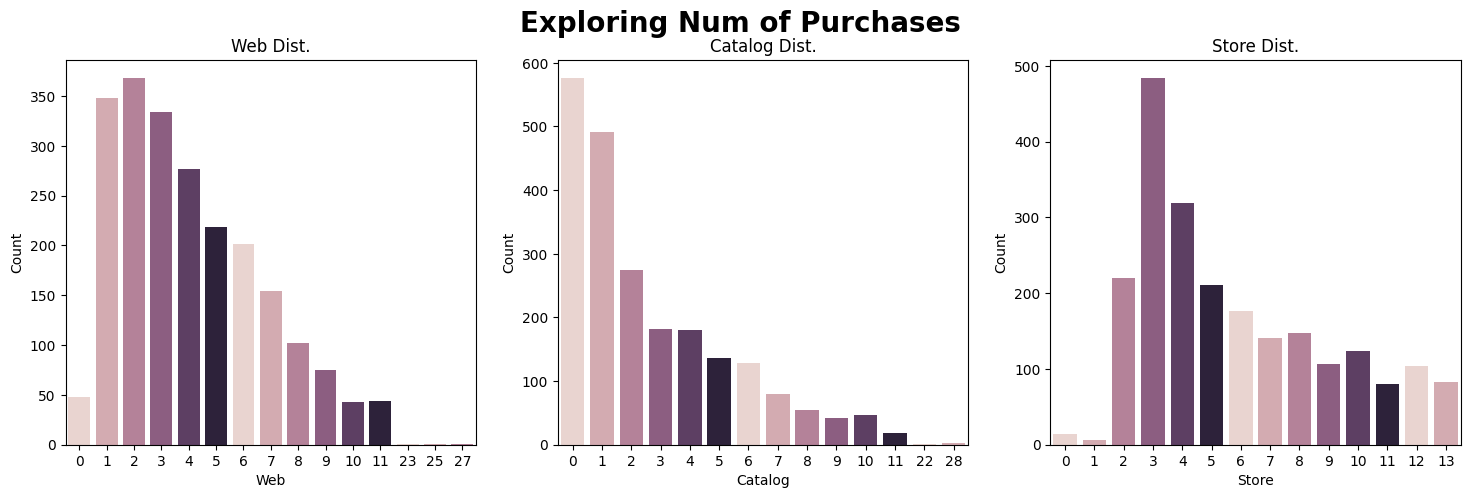

In [80]:
place_to_buy = ['Web', 'Catalog', 'Store']

fig, ax = plt.subplots(1, 3, figsize = (18,5))
plt.suptitle("Exploring Num of Purchases", fontsize=20, weight="bold")

for i in range(3):
    sns.countplot(ax=ax[i], data=data, x=place_to_buy[i], palette=sns.cubehelix_palette())
    ax[i].set_title(f"{place_to_buy[i]} Dist.")
    ax[i].set_ylabel("Count")

plt.show()

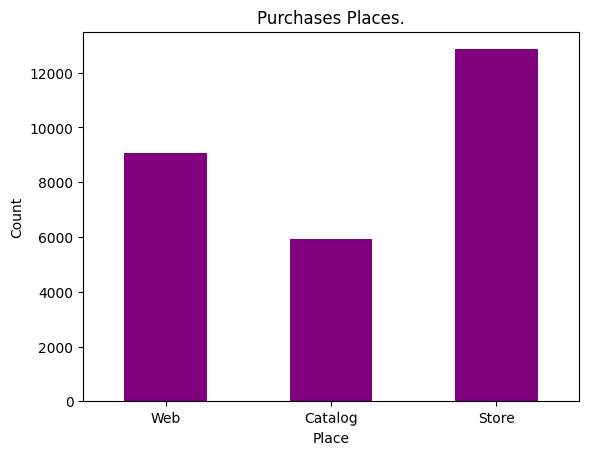

In [101]:
Purchases.plot(kind='bar', legend=False, color="purple")
plt.title("Purchases places.".title())
plt.xticks(rotation=0.45)
plt.xlabel("Place")
plt.ylabel("Count")
plt.show()

In [104]:
data.groupby('Marital_Status')['outcome'].sum().to_frame()

,outcome
Marital_Status,
0,489525
1,855754


In [108]:
products_list = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
l = data.groupby('Marital_Status')[products_list].sum()

fig = px.bar(data_frame=l.reset_index(), x='Marital_Status',
            y=['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold'],
            barmode="group", title="Marital Status by Products Purchase")
fig.show()

In [109]:
data.groupby("Education")["Income"].sum().to_frame()

,Income
Education,
0,10623176.0
1,105156733.0


### K-Mean Time!

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Education          2216 non-null   int64         
 1   Marital_Status     2216 non-null   int64         
 2   Income             2216 non-null   float64       
 3   Dt_Customer        2216 non-null   datetime64[ns]
 4   Recency            2216 non-null   int64         
 5   Wines              2216 non-null   int64         
 6   Fruits             2216 non-null   int64         
 7   Meat               2216 non-null   int64         
 8   Fish               2216 non-null   int64         
 9   Sweets             2216 non-null   int64         
 10  Gold               2216 non-null   int64         
 11  Deals              2216 non-null   int64         
 12  Web                2216 non-null   int64         
 13  Catalog            2216 non-null   int64         
 14  Store   

In [138]:
cols_drop = ['Complain', 'Response', 'Dt_Customer', 'All_campaigns', 'Has_child']
data.drop(cols_drop, axis=1, inplace=True)

In [184]:
from sklearn.preprocessing import StandardScaler

X = data.values[:, :]
X = np.nan_to_num(X)
scaler = StandardScaler()
X = scaler.fit_transform(X)

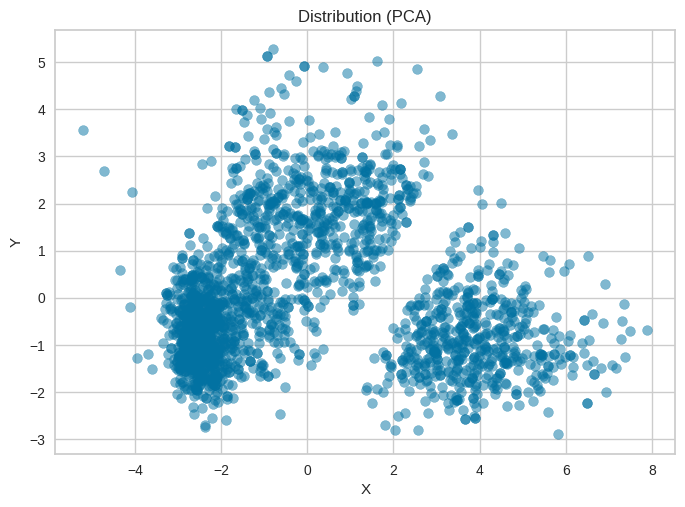

In [185]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotting the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=50, alpha=0.5)

plt.title('Distribution (PCA)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [186]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []
scores = []
for i in range(2, 8):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(X)
    wcss.append(km.inertia_)

    labels = km.labels_
    silhouette_avg = silhouette_score(X, labels)
    scores.append(silhouette_avg)
    print('wcss score for n_cluster = ' + str(i) + ' is ' + str(wcss))
    print('silhoutte score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg) + '\n')

wcss score for n_cluster = 2 is [31588.308182888748]
silhoutte score for n_clusters = 2 is 0.31055004432849626

wcss score for n_cluster = 3 is [31588.308182888748, 26754.072600136788]
silhoutte score for n_clusters = 3 is 0.24226796743589

wcss score for n_cluster = 4 is [31588.308182888748, 26754.072600136788, 25267.82556363244]
silhoutte score for n_clusters = 4 is 0.2049925770877284

wcss score for n_cluster = 5 is [31588.308182888748, 26754.072600136788, 25267.82556363244, 24091.061478955962]
silhoutte score for n_clusters = 5 is 0.19514346145760256

wcss score for n_cluster = 6 is [31588.308182888748, 26754.072600136788, 25267.82556363244, 24091.061478955962, 23221.105570649404]
silhoutte score for n_clusters = 6 is 0.18703822330870018

wcss score for n_cluster = 7 is [31588.308182888748, 26754.072600136788, 25267.82556363244, 24091.061478955962, 23221.105570649404, 22350.27326959457]
silhoutte score for n_clusters = 7 is 0.14632266323481796



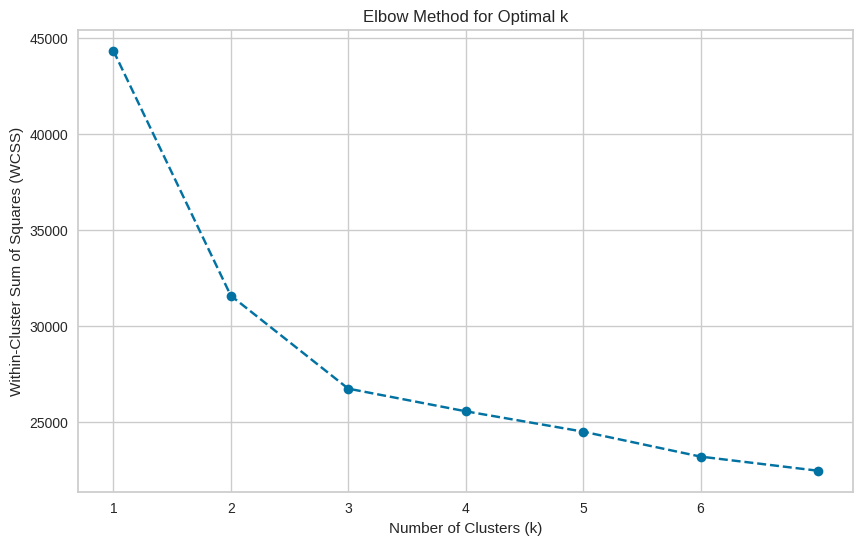

In [187]:
wcss = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=123)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 8), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 7))
plt.grid(True)
plt.show()

In [188]:
clusterNum = 3
k_means = KMeans(init="k-means++", n_clusters=clusterNum, n_init=12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 1 2 ... 0 2 1]


In [189]:
data["cluster"] = labels
data

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Deals,Web,Catalog,Store,NumWebVisitsMonth,Age,outcome,Children,Total_Campaigns,cluster
0,1,0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,67.0,1617,0,0,0
1,1,0,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,70.0,27,2,0,1
2,1,1,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,59.0,776,0,0,2
3,1,1,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,40.0,53,1,0,1
4,1,1,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,43.0,422,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1,1,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,57.0,1341,1,0,2
2236,1,1,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,78.0,444,3,1,2
2237,1,0,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,43.0,1241,0,1,0
2238,1,1,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,68.0,843,1,0,2


In [190]:
data.groupby('cluster').mean()

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Deals,Web,Catalog,Store,NumWebVisitsMonth,Age,outcome,Children,Total_Campaigns
cluster,,,,,,,,,,,,,,,,,,,
0,0.905188,0.620751,77649.212880,49.695886,619.411449,69.060823,466.026834,101.506261,71.223614,78.218247,1.302326,5.159213,6.134168,8.304114,2.821109,55.640751,1405.447227,0.209302,0.728086
1,0.843045,0.650376,35433.407895,49.092105,46.115602,5.018797,23.624060,7.324248,5.063910,15.711466,2.077068,2.170113,0.577068,3.275376,6.422932,52.806729,102.858083,1.238722,0.088346
2,0.942664,0.659359,58470.241147,48.225970,473.465430,24.384486,142.357504,31.821248,24.779089,62.370995,3.728499,6.509275,3.163575,7.973019,5.693086,58.640809,759.178752,1.119730,0.269815


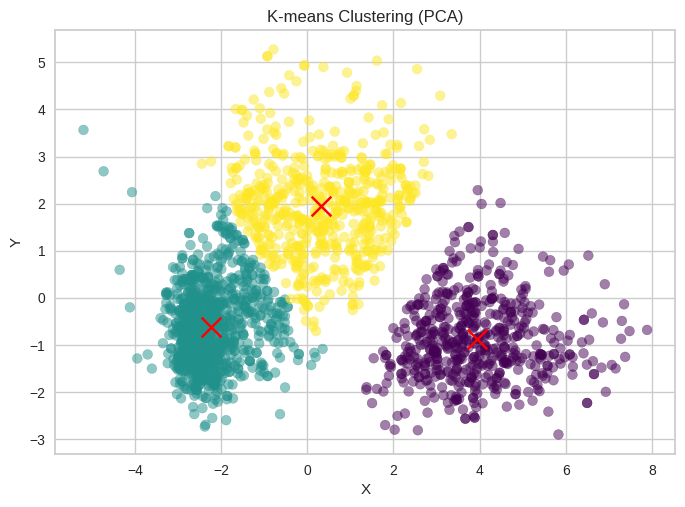

In [191]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels,
            cmap='viridis', s=50, alpha=0.5)

centroids_pca = pca.transform(k_means.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            c='red', marker='x', s=200)

plt.title('K-means Clustering (PCA)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

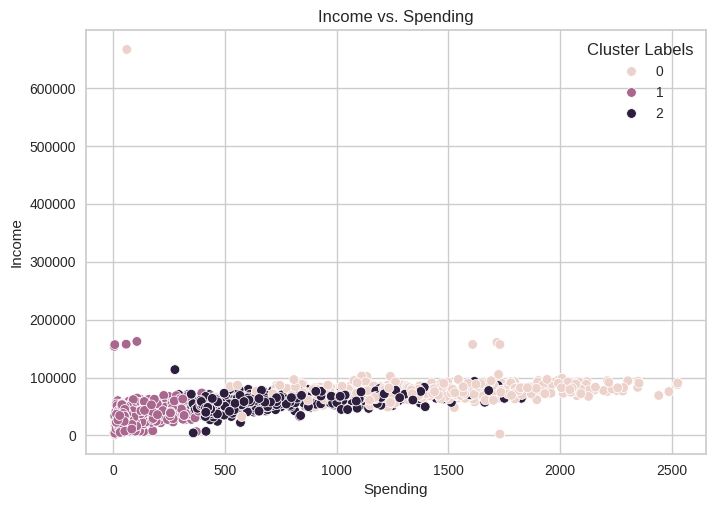

In [194]:
scatter_plot = sns.scatterplot(data=data, y="Income", x="outcome", hue=labels)

scatter_plot.set_title("Income vs. Outcome")
scatter_plot.set_xlabel("Outcome")
scatter_plot.set_ylabel("Income")
scatter_plot.legend(title="Cluster Labels")

plt.show()

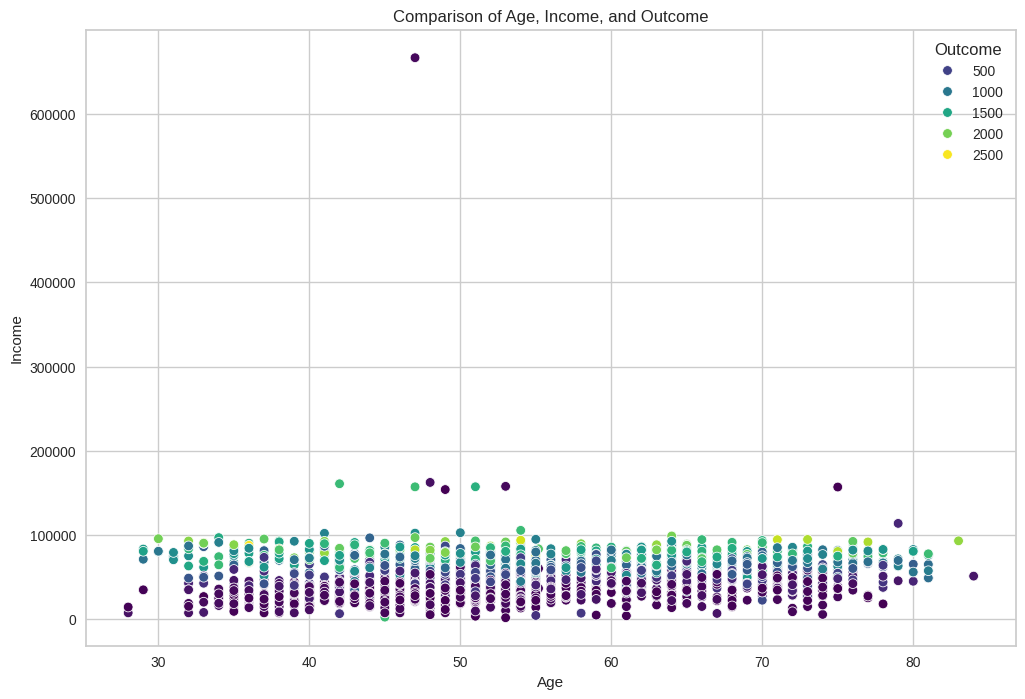

In [195]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Age', y='Income', hue='outcome', palette='viridis')
plt.title('Comparison of Age, Income, and Outcome')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(title='Outcome')
plt.show()